# Case Studies

This jupyter notebook will analyze the results of different study cases for COAST, as well as validate de utility of the tool.

The species selected were, as well as sequence identifiers

|Species|Sequence ID|
|---|---|
|SARS-CoV-2|MN90894.3|
|Salmonella phage PVPSE1|NC_016071.1|
|Sphaerotilus phage vB_SnaP-R1|MN844877.1|

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data
### Import data from basic coast search queries.

In [70]:
sars_swiss_results = pd.read_table("../data/UniProtKB_SwissProt/MN908947.3/coast_results.tab")
sars_swiss_results["origin"]="MN90894.3"

sars_tr_results = pd.read_table("../data/UniProtKB_Trembl/MN908947.3/coast_results.tab")
sars_tr_results["origin"]="MN90894.3"

salmonella_swiss_results = pd.read_table("../data/UniProtKB_SwissProt/NC_016071/coast_results.tab")
salmonella_swiss_results["origin"]="NC_016071.1"

salmonella_tr_results = pd.read_table("../data/UniProtKB_Trembl/NC_016071/coast_results.tab")
salmonella_tr_results["origin"]="NC_016071.1"

sphaerotilus_swiss_results = pd.read_table("../data/UniProtKB_SwissProt/MN844877/coast_results.tab")
sphaerotilus_swiss_results["origin"]="MN844877.1"

sphaerotilus_tr_results = pd.read_table("../data/UniProtKB_Trembl/MN844877/coast_results.tab")
sphaerotilus_tr_results["origin"]="MN844877.1"

swiss_results = pd.concat([sphaerotilus_swiss_results, sars_swiss_results, salmonella_swiss_results])
tr_results = pd.concat([sphaerotilus_tr_results, salmonella_tr_results, sars_tr_results])

### Import data from queries with retrieval tool

In [71]:
sars_swiss_results_retrieve = pd.read_table("../data/UniProtKB_SwissProt/MN908947.3/compare/coast_results.tab")
sars_swiss_results_retrieve["origin"]="MN90894.3"

sars_tr_results_retrieve = pd.read_table("../data/UniProtKB_Trembl/MN908947.3/compare/coast_results.tab")
sars_tr_results_retrieve["origin"]="MN90894.3"

salmonella_swiss_results_retrieve = pd.read_table("../data/UniProtKB_SwissProt/NC_016071/compare/coast_results.tab")
salmonella_swiss_results_retrieve["origin"]="NC_016071.1"

salmonella_tr_results_retrieve = pd.read_table("../data/UniProtKB_Trembl/NC_016071/compare/coast_results.tab")
salmonella_tr_results_retrieve["origin"]="NC_016071.1"

sphaerotilus_swiss_results_retrieve = pd.read_table("../data/UniProtKB_SwissProt/MN844877/compare/coast_results.tab")
sphaerotilus_swiss_results_retrieve["origin"]="MN844877.1"

sphaerotilus_tr_results_retrieve = pd.read_table("../data/UniProtKB_Trembl/MN844877/compare/coast_results.tab")
sphaerotilus_tr_results_retrieve["origin"]="MN844877.1"

swiss_results_retrieve = pd.concat([sars_swiss_results_retrieve, sphaerotilus_swiss_results_retrieve, salmonella_swiss_results_retrieve])
tr_results_retrieve = pd.concat([sars_tr_results_retrieve, sphaerotilus_tr_results_retrieve, salmonella_swiss_results_retrieve])

## Plots

### taai distribution in different queries

#### Full Queries

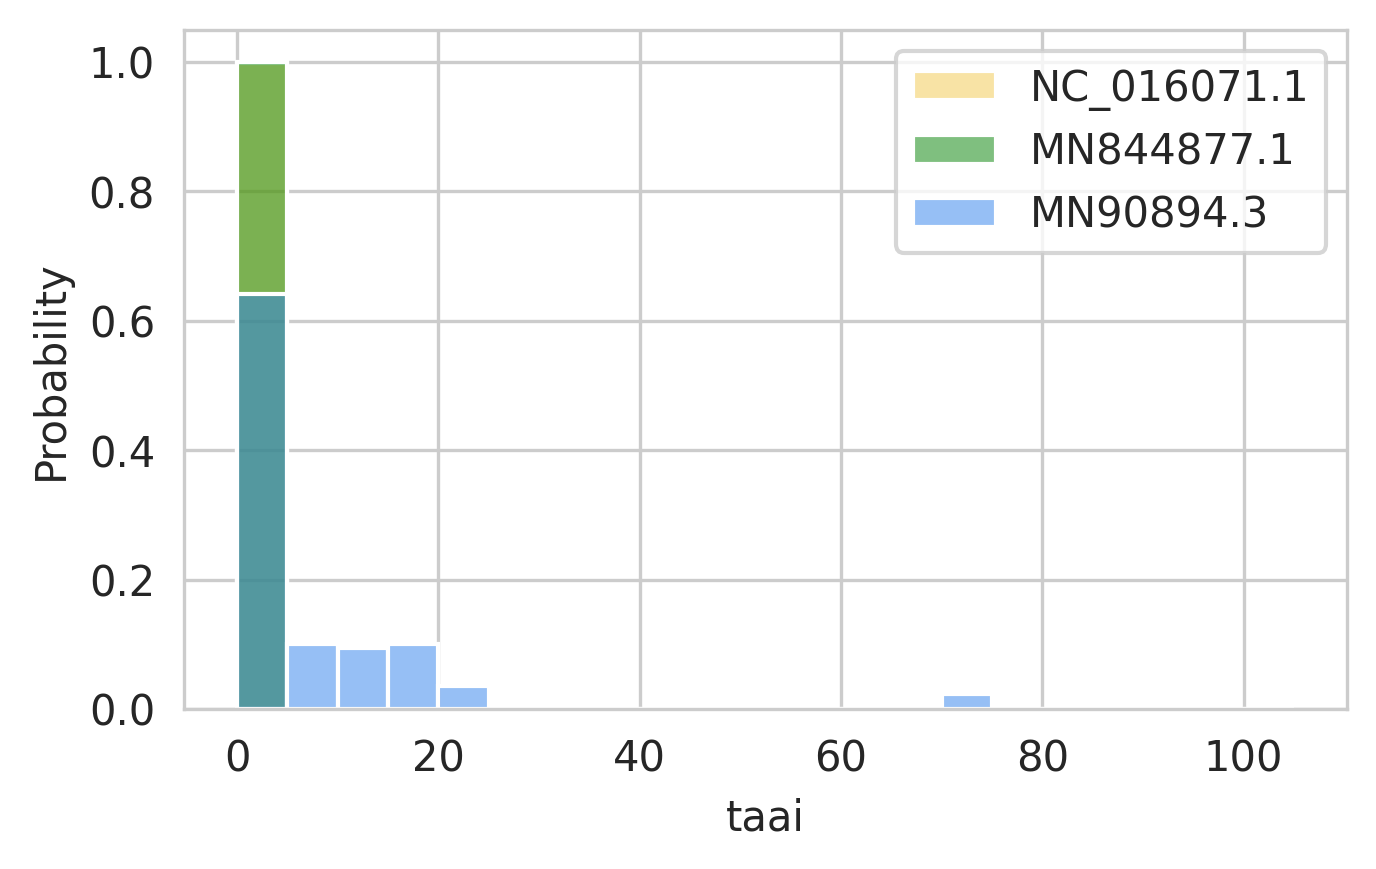

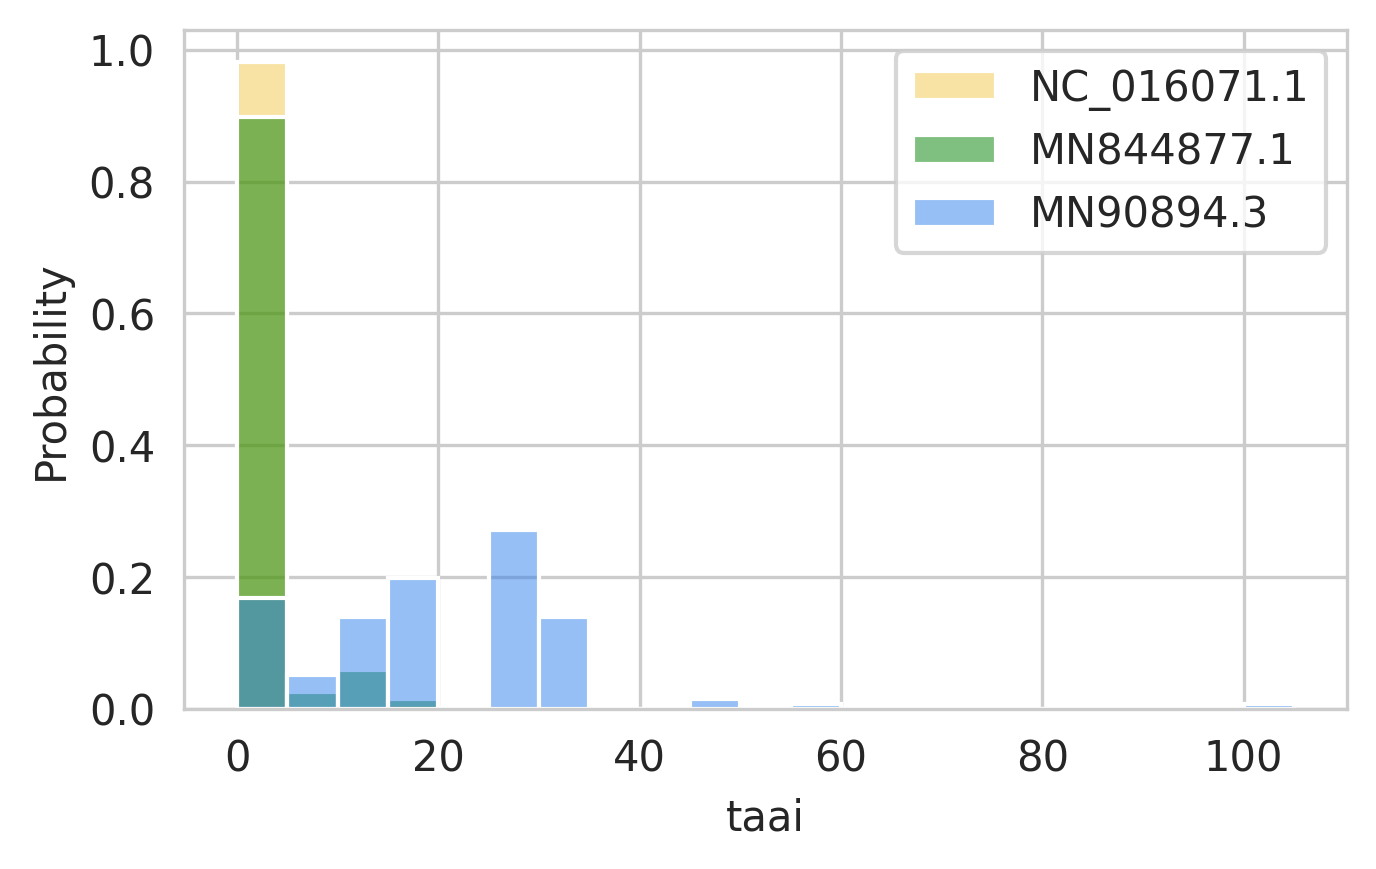

In [72]:
sns.set_style("whitegrid")
sns.plotting_context("paper")
bins_list = range(0,110, 5)

# UniProtKB_SwissProt
plt.figure(figsize=(5,3), dpi= 300)
sns.histplot(salmonella_swiss_results["taai"], bins=bins_list, stat="probability", color="#F2C94C", label="NC_016071.1", alpha=.5)
sns.histplot(sphaerotilus_swiss_results["taai"], bins=bins_list, stat="probability", color="green", label="MN844877.1", alpha=.5)
sns.histplot(sars_swiss_results["taai"], bins=bins_list, stat="probability", color="#2F80ED", label="MN90894.3", alpha=.5)
plt.legend()
plt.savefig('../graphics/hist_taai_sp.png', format='png')
plt.show()

# UniProtKB_Trembl
plt.figure(figsize=(5,3), dpi= 300)
sns.histplot(salmonella_tr_results["taai"], bins=bins_list, stat="probability", color="#F2C94C", label="NC_016071.1", alpha=.5)
sns.histplot(sphaerotilus_tr_results["taai"], bins=bins_list, stat="probability", color="green", label="MN844877.1", alpha=.5)
sns.histplot(sars_tr_results["taai"], bins=bins_list, stat="probability", color="#2F80ED", label="MN90894.3", alpha=.5)
plt.legend()
plt.savefig('../graphics/hist_taai_tr.png', format='png')
plt.show()

#### Basic "coast search" Queries, filtered for low taai values (<5)

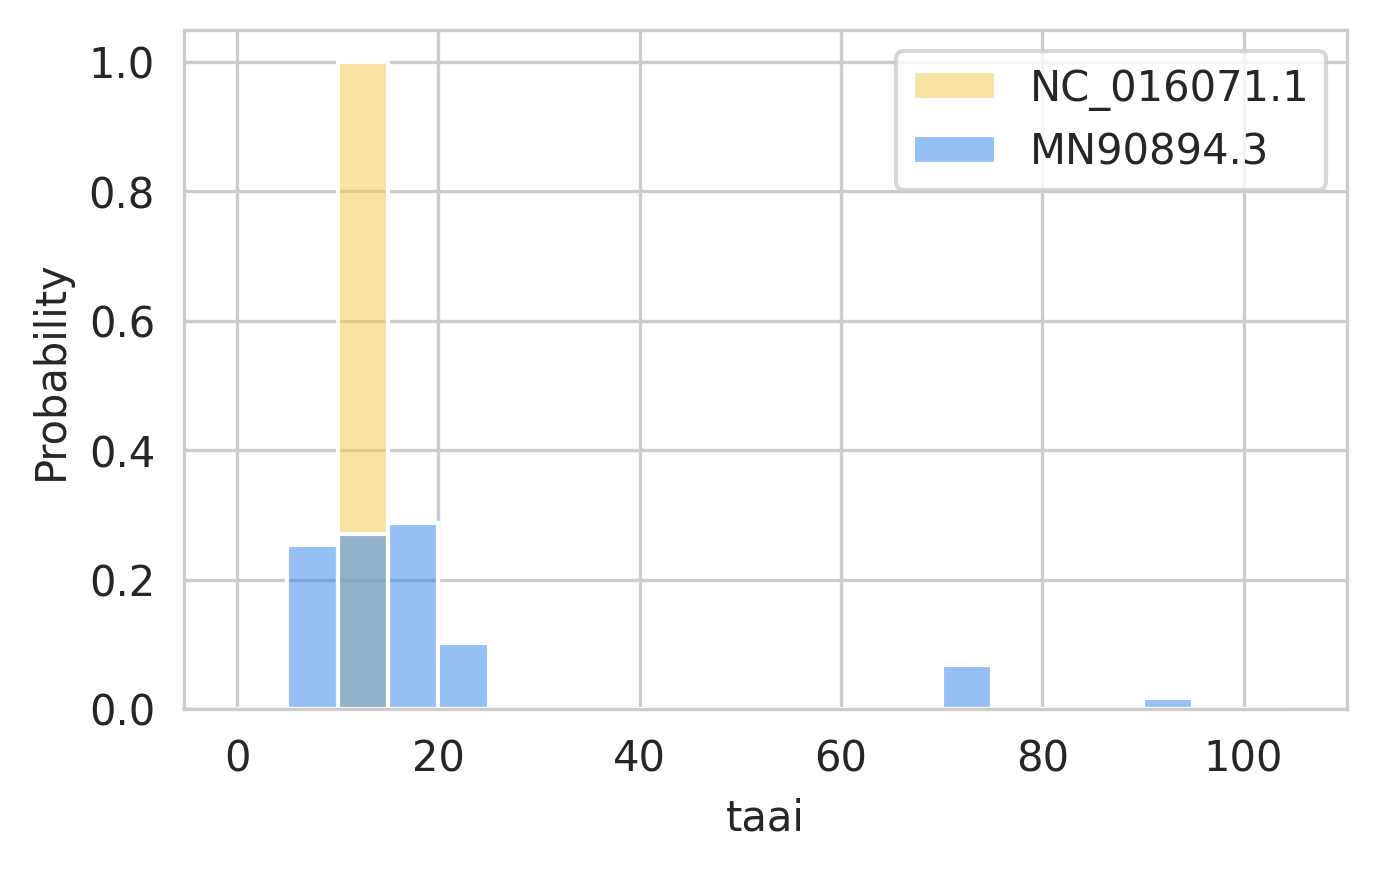

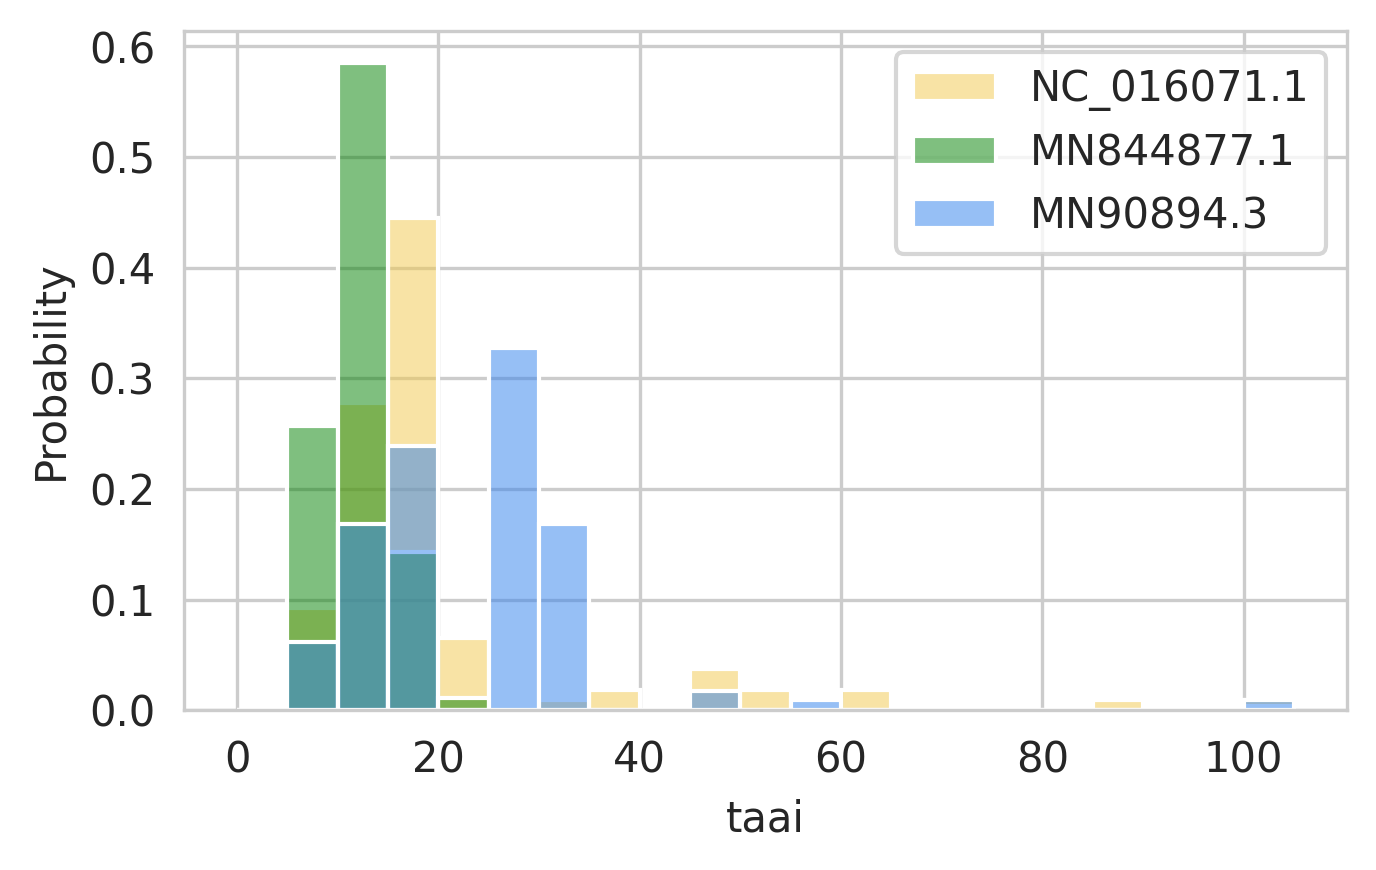

In [73]:
plt.figure(figsize=(5,3), dpi= 300)
sns.histplot(salmonella_swiss_results.taai[salmonella_swiss_results["taai"]>5], bins=bins_list, stat="probability", color="#F2C94C", label="NC_016071.1", alpha=.5)
sns.histplot(sphaerotilus_swiss_results.taai[sphaerotilus_swiss_results["taai"]>5], bins=bins_list, stat="probability", color="g", label="MN844877.1", alpha=.5)
sns.histplot(sars_swiss_results.taai[sars_swiss_results["taai"]>5], bins=bins_list, stat="probability", color="#2F80ED", label="MN90894.3", alpha=.5)
plt.legend()
plt.savefig('../graphics/hist_taai_sp_filter.png', format='png')
plt.show()

plt.figure(figsize=(5,3), dpi= 300)
sns.histplot(salmonella_tr_results.taai[salmonella_tr_results["taai"]>5], bins=bins_list, stat="probability", color="#F2C94C", label="NC_016071.1", alpha=.5)
sns.histplot(sphaerotilus_tr_results.taai[sphaerotilus_tr_results["taai"]>5], bins=bins_list, stat="probability", color="g", label="MN844877.1", alpha=.5)
sns.histplot(sars_tr_results.taai[sars_tr_results["taai"]>5], bins=bins_list, stat="probability", color="#2F80ED", label="MN90894.3", alpha=.5)
plt.legend()
plt.savefig('../graphics/hist_taai_tr_filter.png', format='png')
plt.show()

#### "coast retrieve" and "coast compare" Queries, filtered for low taai values (<5)

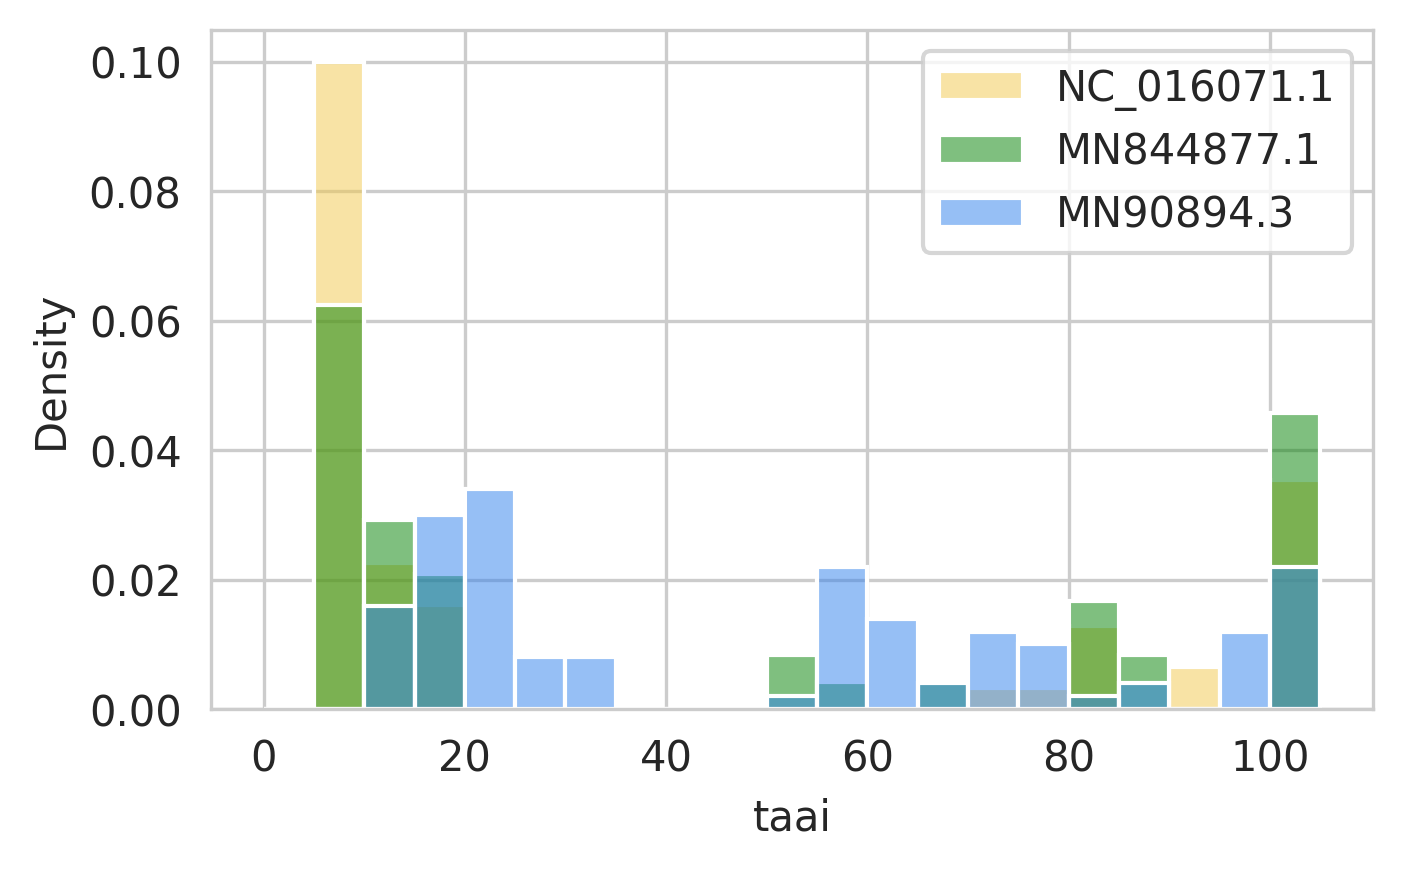

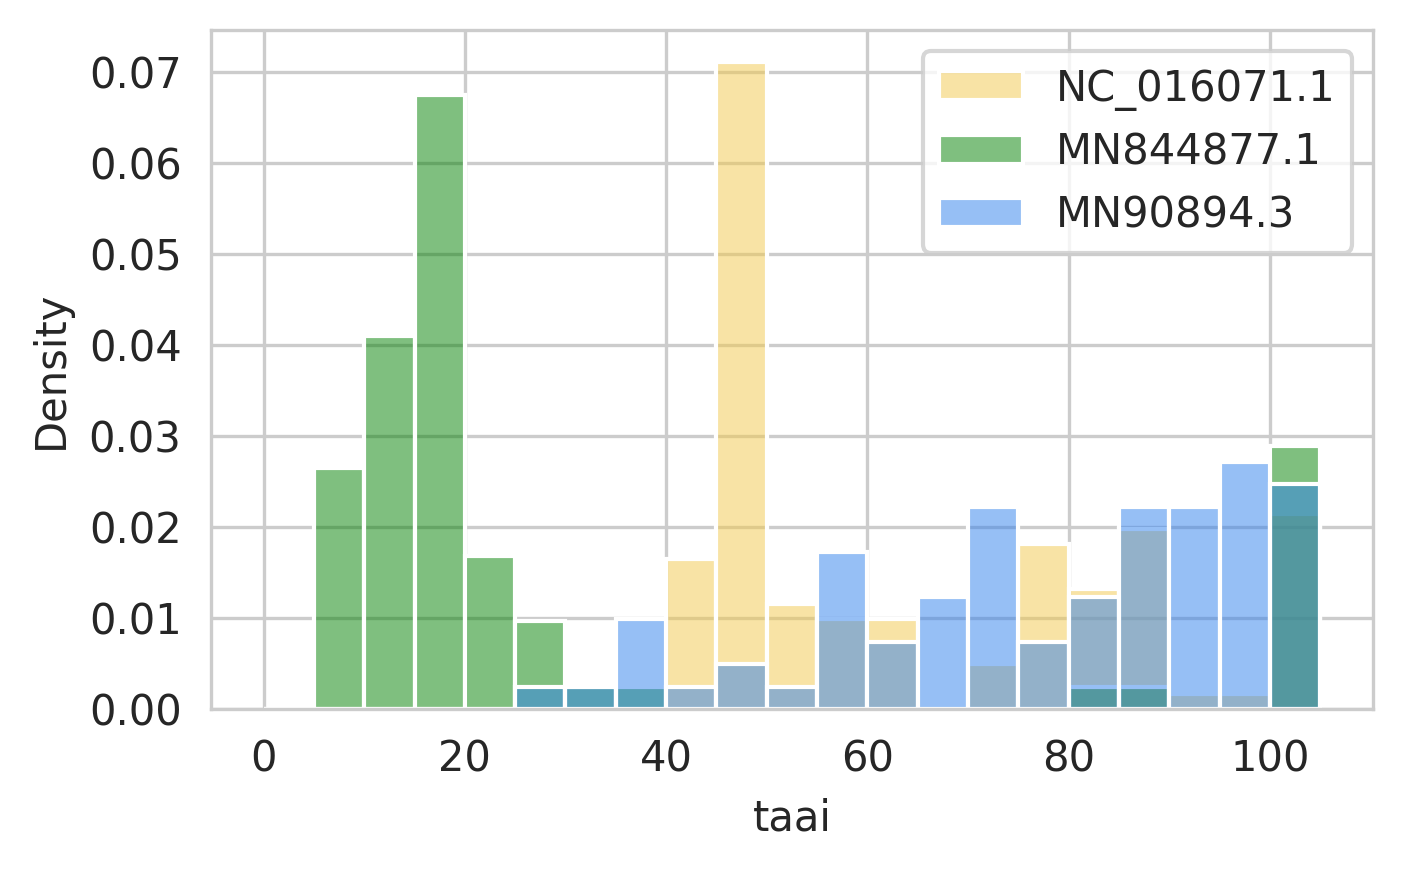

In [74]:
plt.figure(figsize=(5,3), dpi= 300)
sns.histplot(salmonella_swiss_results_retrieve.taai[salmonella_swiss_results_retrieve["taai"]>5], bins=bins_list, stat="density", color="#F2C94C", label="NC_016071.1", alpha=.5)
sns.histplot(sphaerotilus_swiss_results_retrieve.taai[sphaerotilus_swiss_results_retrieve["taai"]>5], bins=bins_list, stat="density", color="g", label="MN844877.1", alpha=.5)
sns.histplot(sars_swiss_results_retrieve.taai[sars_swiss_results_retrieve["taai"]>5], bins=bins_list, stat="density", color="#2F80ED", label="MN90894.3", alpha=.5)
plt.legend()
plt.savefig('../graphics/hist_taai_sp_filter_noretrieve.png', format='png')
plt.show()

plt.figure(figsize=(5,3), dpi= 300)
sns.histplot(salmonella_tr_results_retrieve.taai[salmonella_tr_results_retrieve["taai"]>5], bins=bins_list, stat="density", color="#F2C94C", label="NC_016071.1", alpha=.5)
sns.histplot(sphaerotilus_tr_results_retrieve.taai[sphaerotilus_tr_results_retrieve["taai"]>5], bins=bins_list, stat="density", color="g", label="MN844877.1", alpha=.5)
sns.histplot(sars_tr_results_retrieve.taai[sars_tr_results_retrieve["taai"]>5], bins=bins_list, stat="density", color="#2F80ED", label="MN90894.3", alpha=.5)
plt.legend()
plt.savefig('../graphics/hist_taai_tr_filter_noretrieve.png', format='png')
plt.show()

### taai vs pmatch

<Figure size 1500x1500 with 0 Axes>

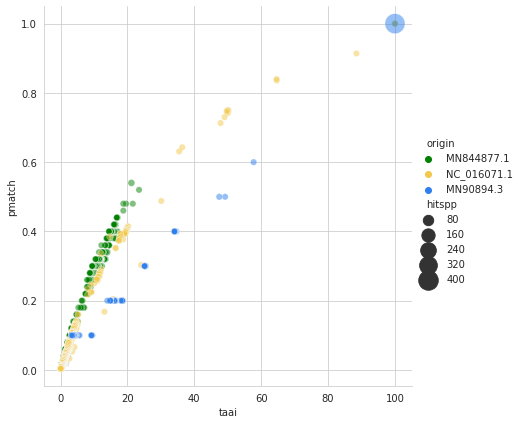

<Figure size 1500x1500 with 0 Axes>

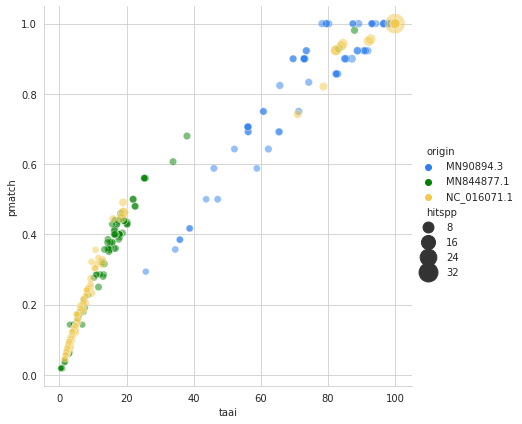

In [75]:
plt.figure(figsize=(5,5), dpi= 300)
sns.relplot(x="taai", y="pmatch", hue="origin", size="hitspp",
            sizes=(40, 400), alpha=.5, palette={"NC_016071.1":"#F2C94C", "MN844877.1": "g","MN90894.3":"#2F80ED"},
            height=6, data=tr_results)
plt.savefig('../graphics/taaiXpmatch_tr.png', format='png')
plt.show()

plt.figure(figsize=(5,5), dpi= 300)
sns.relplot(x="taai", y="pmatch", hue="origin", size="hitspp",
            sizes=(40, 400), alpha=.5, palette={"NC_016071.1":"#F2C94C", "MN844877.1": "g","MN90894.3":"#2F80ED"},
            height=6, data=tr_results_retrieve)
plt.savefig('../graphics/taaiXpmatch_tr_retrieve.png', format='png')
plt.show()

### taai vs aai

<Figure size 1500x1500 with 0 Axes>

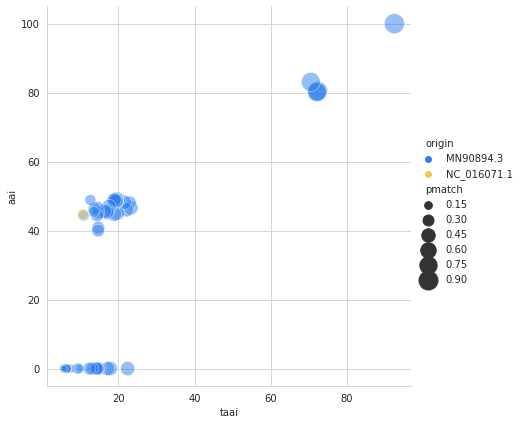

<Figure size 1500x1500 with 0 Axes>

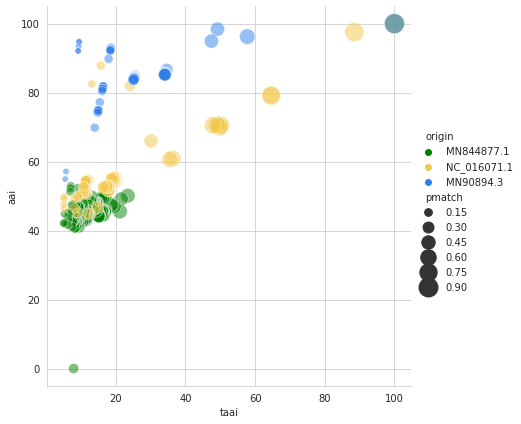

In [76]:
plt.figure(figsize=(5,5), dpi= 300)
sns.relplot(x="taai", y="aai", hue="origin", size="pmatch",
            sizes=(40, 400), alpha=.5, palette={"NC_016071.1":"#F2C94C", "MN844877.1": "g","MN90894.3":"#2F80ED"},
            height=6, data=swiss_results[swiss_results["taai"]>5])
plt.savefig('../graphics/taaiXaai_sp.png', format='png')
plt.show()

plt.figure(figsize=(5,5), dpi= 300)
sns.relplot(x="taai", y="aai", hue="origin", size="pmatch",
            sizes=(40, 400), alpha=.5, palette={"NC_016071.1":"#F2C94C", "MN844877.1": "g","MN90894.3":"#2F80ED"},
            height=6, data=tr_results[tr_results["taai"]>5])
plt.savefig('../graphics/taaiXaai_tr.png', format='png')
plt.show()

### HITSPP

<Figure size 1500x1500 with 0 Axes>

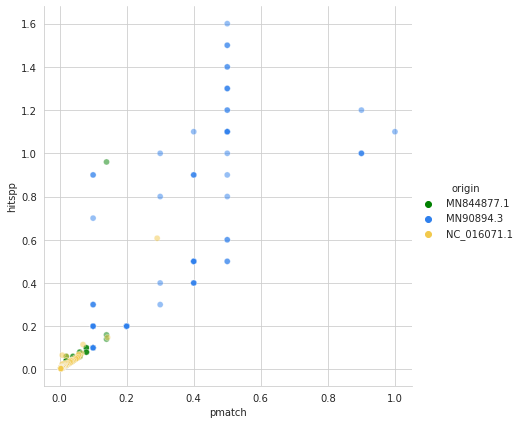

<Figure size 1500x1500 with 0 Axes>

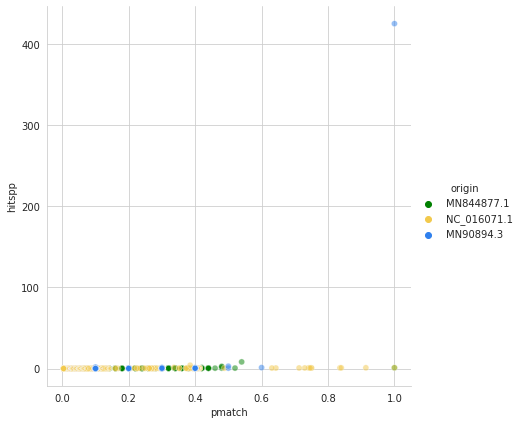

<Figure size 1500x1500 with 0 Axes>

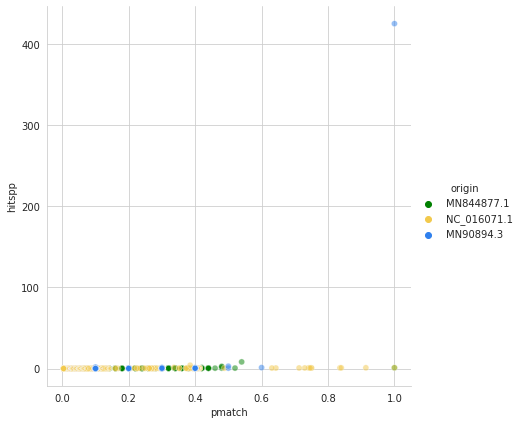

In [77]:
plt.figure(figsize=(5,5), dpi= 300)
sns.relplot(x="pmatch", y="hitspp", hue="origin",
            sizes=(40, 400), alpha=.5, palette={"NC_016071.1":"#F2C94C", "MN844877.1": "g","MN90894.3":"#2F80ED"},
            height=6, data=swiss_results)
plt.savefig('../graphics/hitspp_sp.png', format='png')
plt.show()

plt.figure(figsize=(5,5), dpi= 300)
sns.relplot(x="pmatch", y="hitspp", hue="origin",
            sizes=(40, 400), alpha=.5, palette={"NC_016071.1":"#F2C94C", "MN844877.1": "g","MN90894.3":"#2F80ED"},
            height=6, data=tr_results)
plt.savefig('../graphics/hitspp_tr.png', format='png')
plt.show()

plt.figure(figsize=(5,5), dpi= 300)
sns.relplot(x="pmatch", y="hitspp", hue="origin",
            sizes=(40, 400), alpha=.5, palette={"NC_016071.1":"#F2C94C", "MN844877.1": "g","MN90894.3":"#2F80ED"},
            height=6, data=tr_results)
plt.savefig('../graphics/hitspp_tr_no_outliers.png', format='png')
plt.show()


## Post and Pre retrieval scores

In [87]:
import re

sars_id_table = pd.read_table("../data/UniProtKB_Trembl/MN908947.3/retrieval/retrive_id_table.tab")
sphaerotilus_id_table = pd.read_table("../data/UniProtKB_Trembl/MN844877/retrieval/retrive_id_table.tab")
salmonella_id_table = pd.read_table("../data/UniProtKB_Trembl/NC_016071/retrieval/retrive_id_table.tab")
id_table = pd.concat([sars_id_table, sphaerotilus_id_table, salmonella_id_table])

tr_results_retrieve = tr_results_retrieve[tr_results_retrieve.qname.str.contains("query", case=False, na=False)]
tr_results_retrieve = tr_results_retrieve[~tr_results_retrieve.sname.str.contains("query", case=False, na=False)]
tr_results_retrieve.qname = tr_results_retrieve.qname.str.replace("query_","")